# In this problemstatement weare going to classify the wine based on the features given, now lets import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


lets check weather there is any null values

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

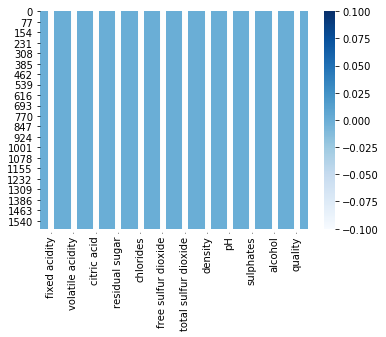

In [7]:
sns.heatmap(data.isnull(),annot = True, cmap = "Blues")

there are no nul values in the data so lets start with EDA process

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [10]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

By the probem statement we have to built a classification model but there are 5 classes which is a bit problematic so lets map them tomake biary classifcation if the wine quality more from 6 and more considered as good quality wine [1] and remaining is not good [0]

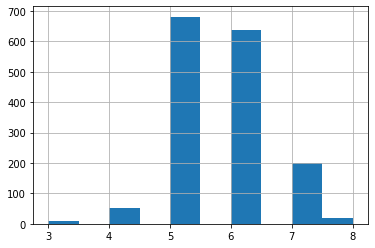

In [11]:
data["quality"].hist()

By the problem statement we have to build a classification problem we have to build a cassification model but there are 5 classes in data so we are going to map them with "1/good" when quality is 7 or greater and remaning is given "0/not good" 

In [12]:
data["winequality"] = [1 if x >= 7 else 0 for x in data["quality"]]
data = data.drop(columns=["quality"], axis = 1)

In [13]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,winequality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Now we have converted it to binary variavles lets start with EDA process

In [14]:
data["winequality"].value_counts()

0    1382
1     217
Name: winequality, dtype: int64

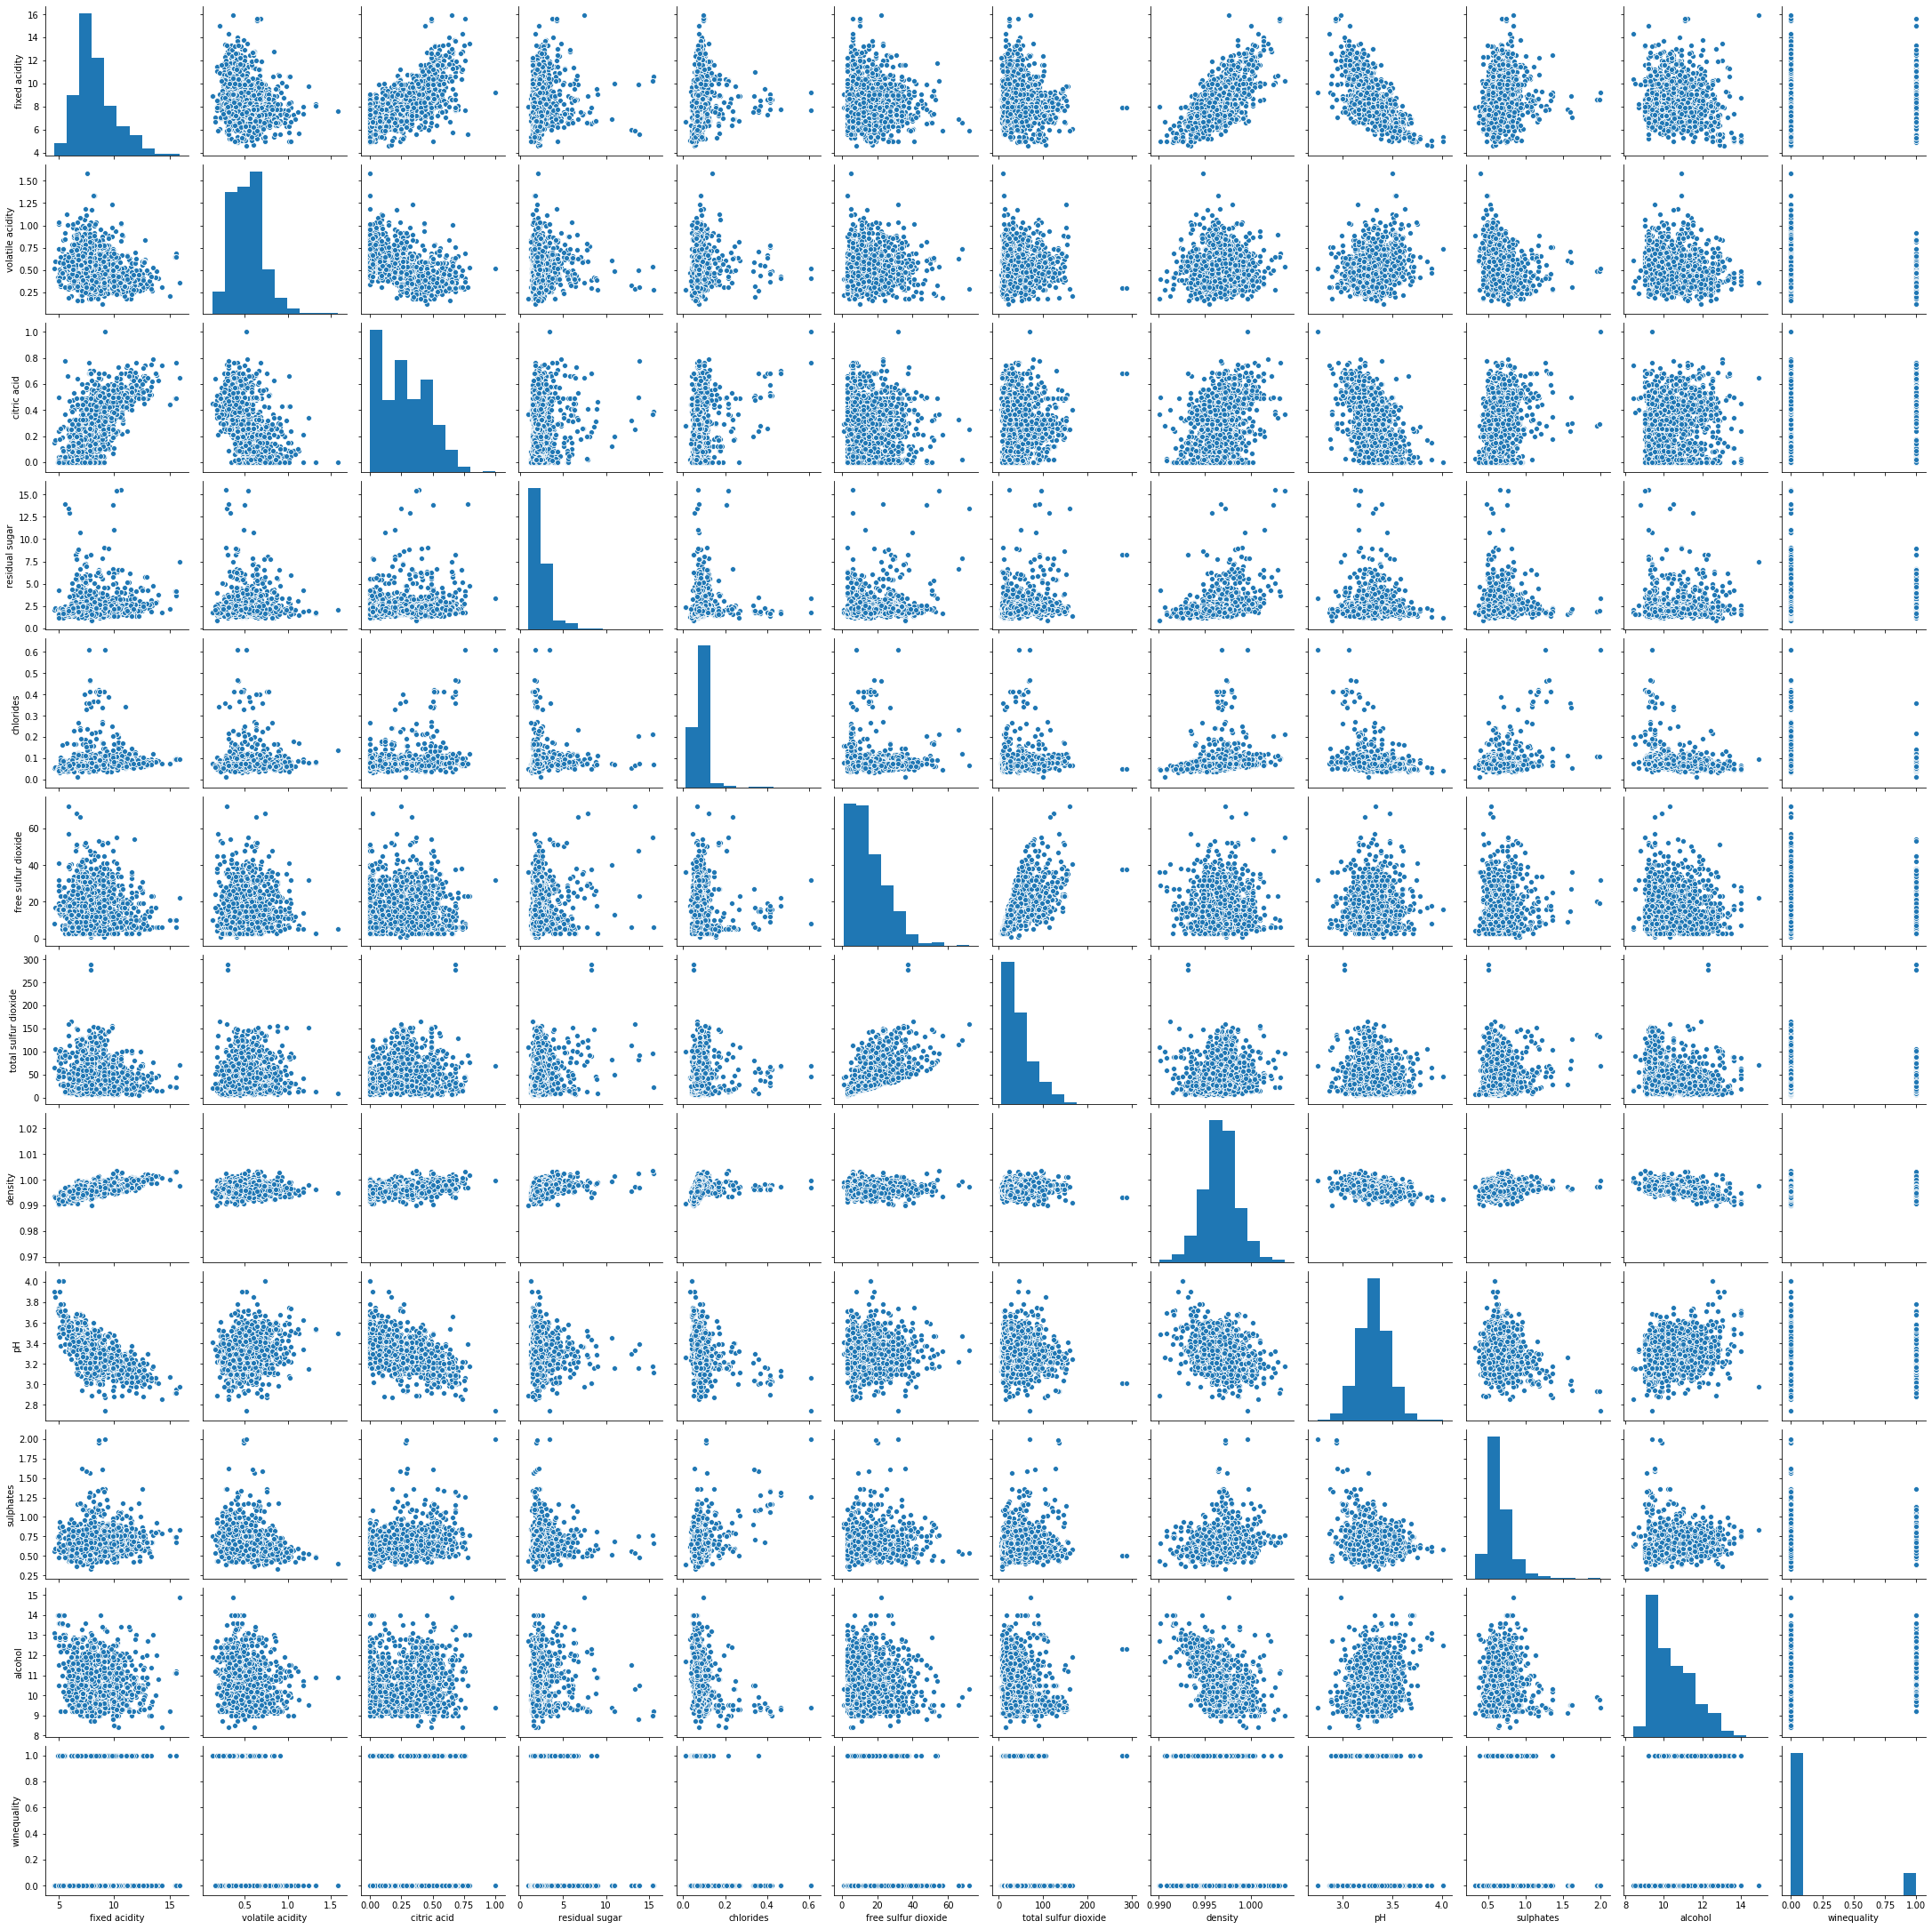

In [15]:
sns.pairplot(data)

As we cansee that there is some skewness in the data nd also some correlation 

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Describe funcion shows statistical analysis on data and also tels us about mean std and also skewnes of data. wine data contained more skewness a we can see there is huge difference in the mean and standatd deviation values 

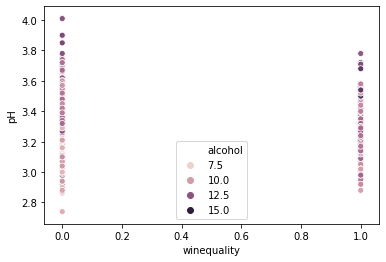

In [17]:
sns.scatterplot(x = "winequality", y = "pH", hue = 'alcohol', data = data)

As the quality increases pH value and alcohol also increases

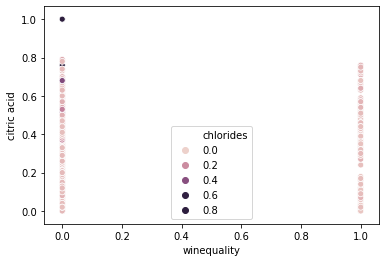

In [18]:
sns.scatterplot(x = "winequality", y = "citric acid", hue = "chlorides", data = data)

chloride content is more in low quality wineand there is no choride 
And aslo in the good quaity wine there is more citric acid than the low quality wine

lets check the correlation

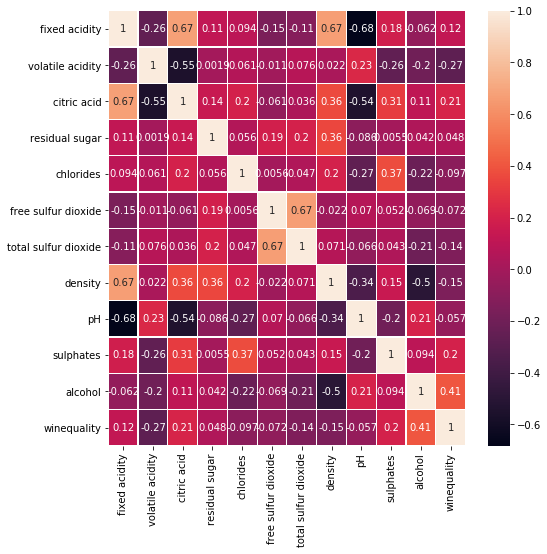

In [19]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), annot = True, linewidths= '.2')

In [20]:
#with this following function we can remove highly correlated values 
def corellation(dataset, threshold):
    col_corr = set() #set of all correlated values
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    
corr_fea = corellation(data, 0.8)
print(corr_fea)
    

set()


So we got some high corellation columns so we can remove them if we dont drop them there will be no use for that 

Now lets check the outliers of the data

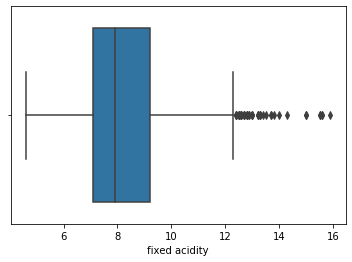

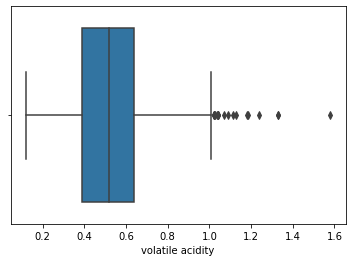

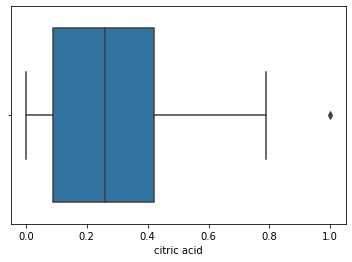

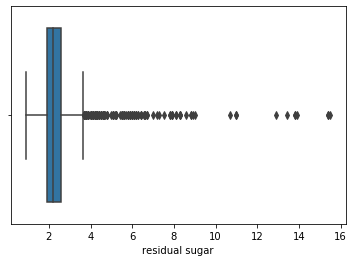

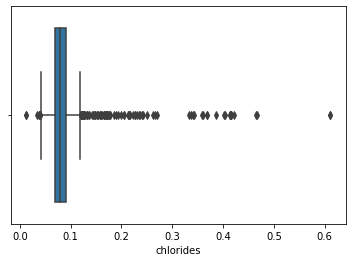

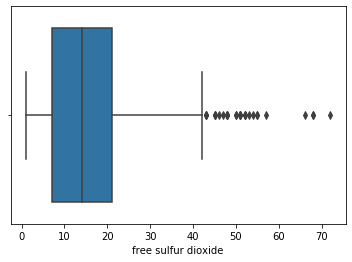

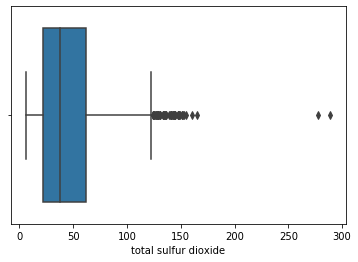

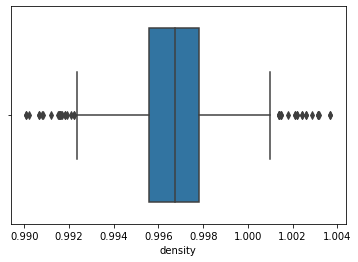

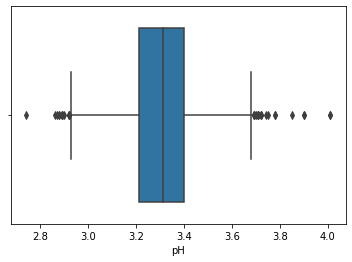

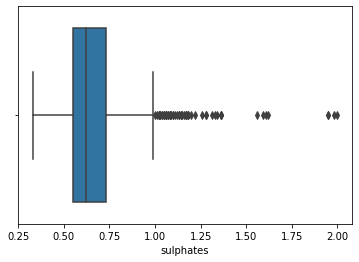

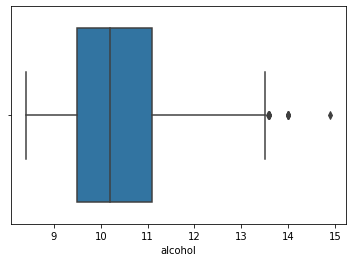

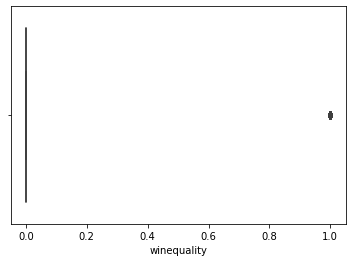

In [21]:
for i in data:
    sns.boxplot(data[i])
    plt.show()
    

there are so many null values lets remove them

In [22]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
print(np.where(z > 3))
newdata = data[(z < 3).all(axis=1)]
print("data before :", data.shape)
print("data after :", newdata.shape)
data = newdata

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [23]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,winequality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [24]:
#Dividing data into x and y 
x = data.drop(columns = ['winequality'], axis = 1)
y = data["winequality"]

In [25]:
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [26]:
x.shape,y.shape

((1458, 11), (1458,))

As there is some skewness in the data lets reduce them

In [27]:
from sklearn.preprocessing import power_transform
noskewdata = pd.DataFrame(power_transform(x, method = 'yeo-johnson'), columns=x.columns)
x = noskewdata

now lets scale the data before creating the model, here i am picking standard scalar which makes the data into standard normal for with mean is equal to zero and standard deviation of 1

In [28]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaleddata = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x = scaleddata

In [29]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
1,-0.172127,1.902404,-1.521870,0.648011,0.981105,1.092232,0.954919,0.056291,-0.818421,0.453527,-0.526854
2,-0.172127,1.344815,-1.242790,0.207208,0.714585,0.241177,0.626959,0.172545,-0.382868,0.221989,-0.526854
3,1.571351,-1.559116,1.441794,-0.610050,-0.207728,0.442705,0.786687,0.750325,-1.112726,-0.391548,-0.526854
4,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.556059,0.513269,-0.977605,-0.374385,0.619516,1.530345,0.319096,-1.059841,0.951840,-0.391548,0.287108
1454,-1.886311,0.229325,-0.849852,0.031636,-1.120823,1.893947,0.540682,-0.929512,1.427375,0.994340,0.901833
1455,-1.451955,-0.007166,-0.663895,0.207208,-0.145674,1.353559,0.177040,-0.563765,0.745438,0.932248,0.742840
1456,-1.886311,0.758466,-0.725146,-0.374385,-0.207728,1.530345,0.319096,-0.722762,1.761962,0.668613,-0.033205


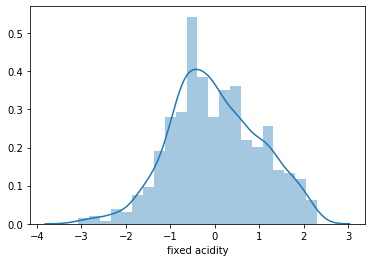

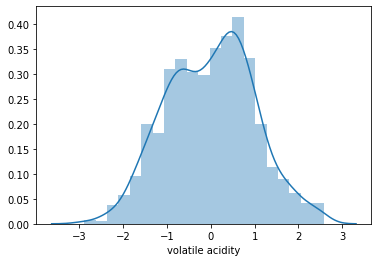

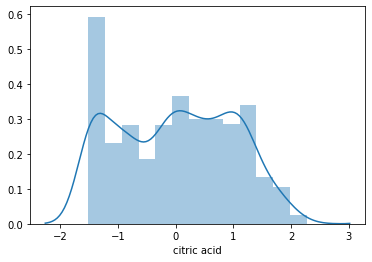

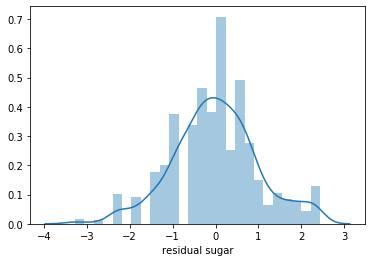

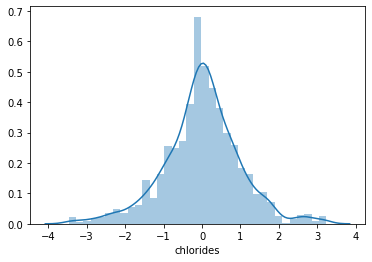

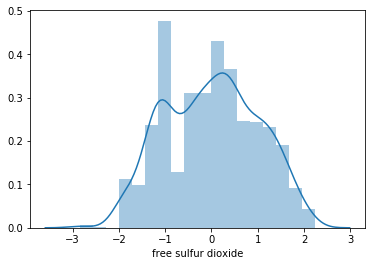

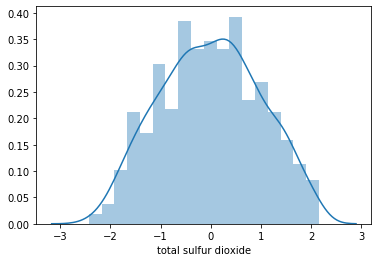

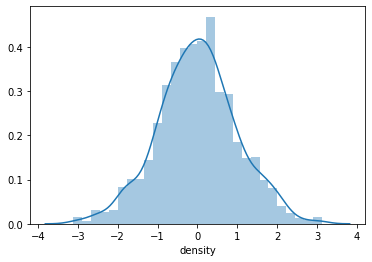

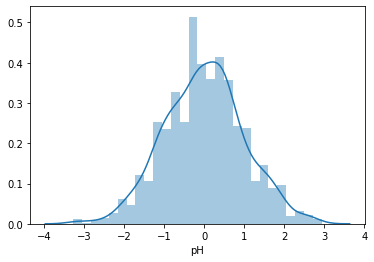

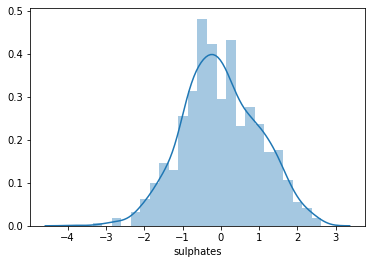

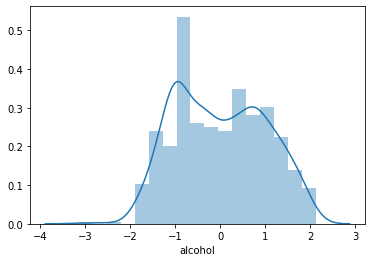

In [30]:
for i in x:
    sns.distplot(x[i])
    plt.show()
    

As we can see that our data is scaled properly Now lets divide the trainig and testing data

In [31]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
seed = 7

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = seed, test_size = 0.33)

In [33]:
x_train.shape,y_train.shape

((976, 11), (976,))

In [34]:
x_test.shape, y_test.shape

((482, 11), (482,))

In [35]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('DEC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('RAN', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.872954, 0.027056
NB: 0.835073, 0.040025
DEC: 0.856596, 0.028810
KNN: 0.884242, 0.024643
SVC: 0.881159, 0.025046
RAN: 0.903734, 0.018764
ADA: 0.869935, 0.025196
GBC: 0.884263, 0.018654


we used Kfold to see the models accuracy to select the best model for further model creation random forest, KNN, and SVC are best models so lets take any two of them

In [36]:
rn = RandomForestClassifier()
svc = SVC()



In [37]:
rn.fit(x_train,y_train)
predictrn = rn.predict(x_test)
print(predictrn)
print(accuracy_score(y_test, predictrn)*100)
print(confusion_matrix(y_test, predictrn))
print(classification_report(y_test, predictrn))

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0]
91.90871369294605
[[4

with random forest we got accuracy of 91 percent

In [38]:
svc.fit(x_train,y_train)
predictsvc = svc.predict(x_test)
print(predictsvc)
print(accuracy_score(y_test, predictsvc)*100)
print(confusion_matrix(y_test, predictsvc))
print(classification_report(y_test, predictsvc))

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0]
89.00414937759335
[[4

with SVC we got 89 percent prediction

Now lets check with cross val score for checking Overfitting

In [39]:
scr = cross_val_score(rn, x, y, cv=5)
scr1 = cross_val_score(svc, x, y, cv=5)
print("cross validation score of random forest:", scr.mean()*100)
print("cross validation score of SVC:", scr1.mean()*100)

cross validation score of random forest: 86.555571246999
cross validation score of SVC: 86.55651273360635


if we want to increase the accuracy we can increase by hyper parameter tuning

Now we are setting parameters list for both Random forest and SVM

In [40]:
param_ran = [{
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [10,100,200]
}]

param_svm = [{
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'C': [0.1, 1, 10, 100, 1000],
    'kernel' : ['linear', 'rbf']
    
}]

In [41]:
grid1 = GridSearchCV(RandomForestClassifier(), param_ran, refit=True, verbose=3, cv = 5)
grid2 = GridSearchCV(SVC(), param_svm, refit=True, verbose=3, cv=5)

In [42]:
grid1.fit(x_train,y_train)
grid2.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.878, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.877, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.903, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.918, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.877, total=   0.0s
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .... criterion=gini, n_estimators=100, score=0.898, total=   0.3s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.897, total=   0.2s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.892, total=   0.3s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.923, total=   0.3s
[CV] criterion=gini, n_estimators=100 ................................
[CV] .... criterion=gini, n_estimators=100, score=0.897, total=   0.2s
[CV] criterion=gini, n_estimators=200 ................................
[CV] .... criterion=gini, n_estimators=200, score=0.898, total=   0.4s
[CV] criterion=gini, n_estimators=200 ................................
[CV] .... criterion=gini, n_estimators=200, score=0.892, total=   0.4s
[CV] criterion=gini, n_estimators=200 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    7.5s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.857, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.862, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.862, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.862, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.856, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.857, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.862, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.862, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.862, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.856, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.857, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.862, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.862, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.862, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.892, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.856, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.857, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.862, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.862, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.862, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] .... C=10, gamma=0.001, kernel=linear, score=0.851, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.862, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.887, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.856, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.857, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.862, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.862, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.883, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.851, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.862, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.887, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.856, total=   1.4s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.857, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.862, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [43]:
print(grid1.best_params_)
print(grid2.best_params_)

{'criterion': 'gini', 'n_estimators': 100}
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [44]:
Randomforest_prediction = grid1.predict(x_test)

print(accuracy_score(y_test, Randomforest_prediction))
print(confusion_matrix(y_test, Randomforest_prediction))
print(classification_report(y_test,Randomforest_prediction))


0.9294605809128631
[[410   8]
 [ 26  38]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       418
           1       0.83      0.59      0.69        64

    accuracy                           0.93       482
   macro avg       0.88      0.79      0.83       482
weighted avg       0.93      0.93      0.92       482



In [45]:
SVC_prediction = grid2.predict(x_test)

print(accuracy_score(y_test, SVC_prediction))
print(confusion_matrix(y_test, SVC_prediction))
print(classification_report(y_test,SVC_prediction))


0.9024896265560166
[[400  18]
 [ 29  35]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       418
           1       0.66      0.55      0.60        64

    accuracy                           0.90       482
   macro avg       0.80      0.75      0.77       482
weighted avg       0.90      0.90      0.90       482



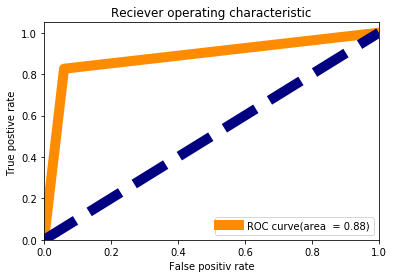

In [46]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Randomforest_prediction, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr ,tpr, color='darkorange', lw=10, label='ROC curve(area  = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color = 'navy', lw = 10, linestyle = '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.xlabel("False positiv rate")
plt.ylabel("True postive rate ")
plt.title("Reciever operating characteristic")
plt.legend(loc = "lower right")
plt.show()

see by hyper parameter tuning we have increased accuracy by 92 and 90 percent

In [47]:
import joblib

print(joblib.dump(Randomforest_prediction, "Randomforestmodel.obj"))
print(joblib.dump(SVC_prediction, "SVCmodel.obj"))

['Randomforestmodel.obj']
['SVCmodel.obj']


In [48]:
model1 = joblib.load("Randomforestmodel.obj")
model2 = joblib.load("SVCmodel.obj")

In [49]:
import numpy as np
a = np.array(y_test)
predicted =  np.array(rn.predict(x_test))
submission = pd.DataFrame({'original' : a, "predicted": predicted}, index=range(len(a)))

In [50]:
submission.sample(10)

,original,predicted
267,0,0
343,0,0
372,0,0
74,0,0
89,0,0
244,0,0
360,0,0
373,0,0
335,0,0
52,0,0
